Imports


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

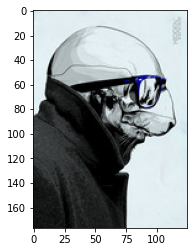

In [31]:
img=cv2.imread('posters/9714_125.jpg')
plt.imshow(img)


Converting from BGR to RGB


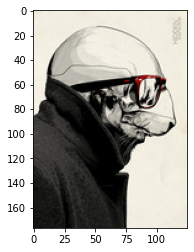

In [32]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

Reshaping the image


In [33]:
img=img.reshape((img.shape[1]*img.shape[0],3))


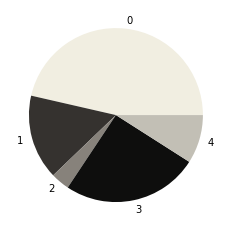

In [47]:
kmeans=KMeans(n_clusters=5)
s=kmeans.fit(img)
labels=kmeans.labels_
centroid=kmeans.cluster_centers_
labels=list(labels)
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

In [76]:
rounded_centroids=np.round(centroid)
r=rounded_centroids.astype(int)
r

array([[241, 238, 225],
       [ 53,  50,  47],
       [135, 130, 123],
       [ 14,  14,  13],
       [194, 191, 181]])

In [79]:
import csv
header = ['red_1', 'green_1', 'blue_1', 'red_2', 'green_2', 'blue_2',
                 'red_3', 'green_3', 'blue_3','red_4', 'green_4', 'blue_4',
                 'red_5', 'green_5', 'blue_5']
data = [
    {
        'red_1':r[0,0], 'green_1':r[0,1], 'blue_1':r[0,2],
        'red_2':r[1,0], 'green_2':r[1,1], 'blue_2':r[1,2],
        'red_3':r[2,0], 'green_3':r[2,1], 'blue_3':r[2,2],
        'red_4':r[3,0], 'green_4':r[3,1], 'blue_4':r[3,2],
        'red_5':r[4,0], 'green_5':r[4,1], 'blue_5':r[4,2],
    }
]
with open('test.csv', 'w') as file:
    # Create a CSV dictionary writer and add the student header as field names
    writer = csv.DictWriter(file, fieldnames=header)
    # Use writerows() not writerow()
    writer.writeheader()
    writer.writerows(data)

In [80]:
import pandas as pd
pd.read_csv('test.csv') 

,red_1,green_1,blue_1,red_2,green_2,blue_2,red_3,green_3,blue_3,red_4,green_4,blue_4,red_5,green_5,blue_5
0,241,238,225,53,50,47,135,130,123,14,14,13,194,191,181
